In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


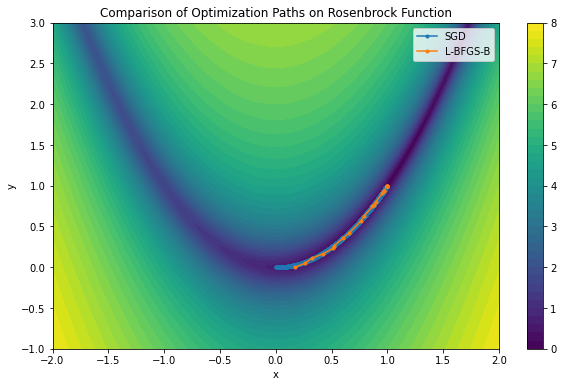

In [2]:
# Define the Rosenbrock function
def rosenbrock(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

# Gradient of the Rosenbrock function
def rosenbrock_grad(x):
    dfdx0 = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    dfdx1 = 200*(x[1]-x[0]**2)
    return np.array([dfdx0, dfdx1])

# Vanilla Gradient Descent (using a manual update rule)
def gradient_descent(func, grad, lr=0.001, max_iter=10000, tol=1e-6):
    x = np.array([0., 0.])
    history = [x]
    for i in range(max_iter):
        gradient = grad(x)
        x = x - lr * gradient
        history.append(x)
        if np.linalg.norm(gradient) < tol:
            break
    return np.array(history)

lbfgsb_path_list = []

def callback(x):
    lbfgsb_path_list.append(np.array(x))

# Using L-BFGS-B from scipy
res = minimize(rosenbrock, [0., 0.], method='L-BFGS-B', jac=rosenbrock_grad, callback=callback)
lbfgsb_path = np.array(lbfgsb_path_list)

# Using Vanilla Gradient Descent
sgd_path = gradient_descent(rosenbrock, rosenbrock_grad)

# Plotting
plt.figure(figsize=(10, 6))
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100*(Y - X**2)**2

plt.contourf(X, Y, np.log1p(Z), 50, cmap='viridis')
plt.colorbar()
plt.plot(sgd_path[:, 0], sgd_path[:, 1], label="SGD", marker='o', markersize=3)
plt.plot(lbfgsb_path[:, 0], lbfgsb_path[:, 1], label="L-BFGS-B", marker='o', markersize=3)
plt.legend()
plt.title('Comparison of Optimization Paths on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [3]:
print("Minimum value of function achieved through Gradient Descent: ",sgd_path[-1, 0])
print("Minimum value of function achieved through LBGSB: ",lbfgsb_path[-1, 0])
print("Number of iterations for Gradient Descent: ",len(sgd_path))
print("Minimum value of function achieved through LBGSB: ",len(lbfgsb_path))

Minimum value of function achieved through Gradient Descent:  0.9944009477070963
Minimum value of function achieved through LBGSB:  0.9999997057368228
Number of iterations for Gradient Descent:  10001
Minimum value of function achieved through LBGSB:  21


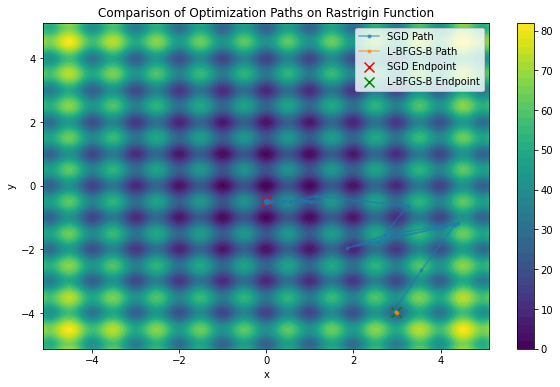

In [4]:
# Define the Rastrigin function
def rastrigin(x):
    return 20 + sum(xi**2 - 10 * np.cos(2 * np.pi * xi) for xi in x)

# Gradient of the Rastrigin function
def rastrigin_grad(x):
    return np.array([2*x[0] + 10*2*np.pi*x[0]*np.sin(2*np.pi*x[0]),
                     2*x[1] + 10*2*np.pi*x[1]*np.sin(2*np.pi*x[1])])

# Vanilla Gradient Descent
def gradient_descent(func, grad, init, lr=0.001, max_iter=10000, tol=1e-6):
    x = np.array(init)
    history = [x]
    for i in range(max_iter):
        gradient = grad(x)
        x = x - lr * gradient
        history.append(x)
        if np.linalg.norm(gradient) < tol:
            break
    return np.array(history)

init_point = [3.0, -4.0]

lbfgsb_path_list = [init_point]

def callback(x):
    lbfgsb_path_list.append(np.array(x))

# Vanilla Gradient Descent
sgd_path = gradient_descent(rastrigin, rastrigin_grad, init=init_point, lr=0.01, max_iter=10000)

# L-BFGS-B from scipy
res = minimize(rastrigin, init_point, method='L-BFGS-B', jac=rastrigin_grad, callback=callback)
lbfgsb_path = np.array(lbfgsb_path_list)


# Plotting
plt.figure(figsize=(10, 6))
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = 20 + X**2 + Y**2 - 10*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))

plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar()
plt.plot(sgd_path[:, 0], sgd_path[:, 1], label="SGD Path", marker='o', markersize=3, alpha=0.6)
plt.plot(lbfgsb_path[:, 0], lbfgsb_path[:, 1], label="L-BFGS-B Path", marker='o', markersize=3, alpha=0.6)

# Marking the endpoints
plt.scatter(sgd_path[-1, 0], sgd_path[-1, 1], color='red', s=100, marker='x', label='SGD Endpoint')
plt.scatter(lbfgsb_path[-1, 0], lbfgsb_path[-1, 1], color='green', s=100, marker='x', label='L-BFGS-B Endpoint')

plt.legend()
plt.title('Comparison of Optimization Paths on Rastrigin Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [5]:
print("Minimum value of function achieved through Gradient Descent: ",sgd_path[-1, 0])
print("Minimum value of function achieved through LBGSB: ",lbfgsb_path[-1, 0])
print("Number of iterations for Gradient Descent: ",len(sgd_path))
print("Minimum value of function achieved through LBGSB: ",len(lbfgsb_path))

Minimum value of function achieved through Gradient Descent:  4.832514021641126e-07
Minimum value of function achieved through LBGSB:  2.9850414611561127
Number of iterations for Gradient Descent:  471
Minimum value of function achieved through LBGSB:  3


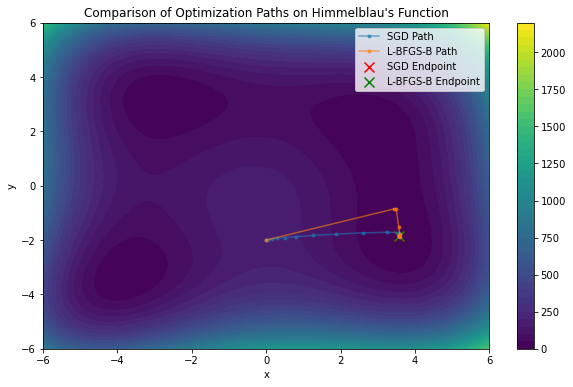

In [6]:
# Define Himmelblau's function
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Gradient of the Himmelblau's function
def himmelblau_grad(x):
    dfdx = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    dfdy = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([dfdx, dfdy])

init_point = [0, -2]

lbfgsb_path_list = [init_point]

def callback(x):
    lbfgsb_path_list.append(np.array(x))

sgd_path = gradient_descent(himmelblau, himmelblau_grad, init=init_point, lr=0.01, max_iter=10000)

res = minimize(himmelblau, init_point, method='L-BFGS-B', jac=himmelblau_grad, callback=callback)
lbfgsb_path = np.array(lbfgsb_path_list)

# Plotting
plt.figure(figsize=(10, 6))
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2

plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar()
plt.plot(sgd_path[:, 0], sgd_path[:, 1], label="SGD Path", marker='o', markersize=3, alpha=0.6)
plt.plot(lbfgsb_path[:, 0], lbfgsb_path[:, 1], label="L-BFGS-B Path", marker='o', markersize=3, alpha=0.6)

# Marking the endpoints
plt.scatter(sgd_path[-1, 0], sgd_path[-1, 1], color='red', s=100, marker='x', label='SGD Endpoint')
plt.scatter(lbfgsb_path[-1, 0], lbfgsb_path[-1, 1], color='green', s=100, marker='x', label='L-BFGS-B Endpoint')

plt.legend()
plt.title("Comparison of Optimization Paths on Himmelblau's Function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [7]:
print("Minimum value of function achieved through Gradient Descent: ",sgd_path[-1, 0])
print("Minimum value of function achieved through LBGSB: ",lbfgsb_path[-1, 0])
print("Number of iterations for Gradient Descent: ",len(sgd_path))
print("Minimum value of function achieved through LBGSB: ",len(lbfgsb_path))

Minimum value of function achieved through Gradient Descent:  3.5844283386724567
Minimum value of function achieved through LBGSB:  3.584428343318664
Number of iterations for Gradient Descent:  58
Minimum value of function achieved through LBGSB:  10


In [ ]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[1] + x[0] / 2 + 47))) - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47)))))

def eggholder_grad(x):
    dx = -np.sin(np.sqrt(abs(x[0] - (x[1] + 47)))) * np.sqrt(abs(x[0] - (x[1] + 47))) - (x[1] + 47) * 0.5 * np.sign(x[1] + x[0] / 2 + 47) * np.sin(np.sqrt(abs(x[1] + x[0] / 2 + 47))) / np.sqrt(abs(x[1] + x[0] / 2 + 47))
    dy = -np.sin(np.sqrt(abs(x[1] + x[0] / 2 + 47))) * np.sqrt(abs(x[1] + x[0] / 2 + 47)) + np.sign(x[0] - (x[1] + 47)) * np.sin(np.sqrt(abs(x[0] - (x[1] + 47)))) / np.sqrt(abs(x[0] - (x[1] + 47)))
    return np.array([dx, dy])

# Gradient Descent
def gradient_descent(f, grad_f, init, lr=0.001, max_iter=1000):
    path = [init]
    x = init
    for _ in range(max_iter):
        x = x - lr * grad_f(x)
        path.append(x)
    return np.array(path)

init_point = [100, 200]
sgd_path = gradient_descent(eggholder, eggholder_grad, init=init_point, lr=0.001, max_iter=5000)

lbfgsb_path_list = [init_point]
def callback(x):
    lbfgsb_path_list.append(np.array(x))
    
res = minimize(eggholder, init_point, method='L-BFGS-B', jac=eggholder_grad, callback=callback, options={'maxiter': 500})
lbfgsb_path = np.array(lbfgsb_path_list)

# Plotting
plt.figure(figsize=(10, 6))
x = np.linspace(-512, 512, 400)
y = np.linspace(-512, 512, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = eggholder([X[i, j], Y[i, j]])

plt.contourf(X, Y, Z, 50, cmap='viridis', levels=100)
plt.colorbar()

# Paths
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'r', label="SGD", alpha=0.6)
plt.plot(lbfgsb_path[:, 0], lbfgsb_path[:, 1], 'b', label="L-BFGS-B", alpha=0.6)

# Endpoints
plt.scatter(sgd_path[-1, 0], sgd_path[-1, 1], color='red', s=100, marker='x', label='SGD Endpoint')
plt.scatter(lbfgsb_path[-1, 0], lbfgsb_path[-1, 1], color='blue', s=100, marker='o', label='L-BFGS-B Endpoint')

plt.legend()
plt.title("Comparison on Eggholder Function")
plt.show()


In [ ]:
print("Minimum value of function achieved through Gradient Descent: ",sgd_path[-1, 0])
print("Minimum value of function achieved through LBGSB: ",lbfgsb_path[-1, 0])
print("Number of iterations for Gradient Descent: ",len(sgd_path))
print("Minimum value of function achieved through LBGSB: ",len(lbfgsb_path))